In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
# Caricamento dei dati e esplorazione dei datasets
fake_data=pd.read_csv('/content/Fake.csv')
true_data=pd.read_csv('/content/True.csv')

In [ ]:
fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
true_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
# Unione dei dataset con una colonna 'label'
true_data['label'] = 0
fake_data['label'] = 1
data = pd.concat([true_data, fake_data], ignore_index=True)

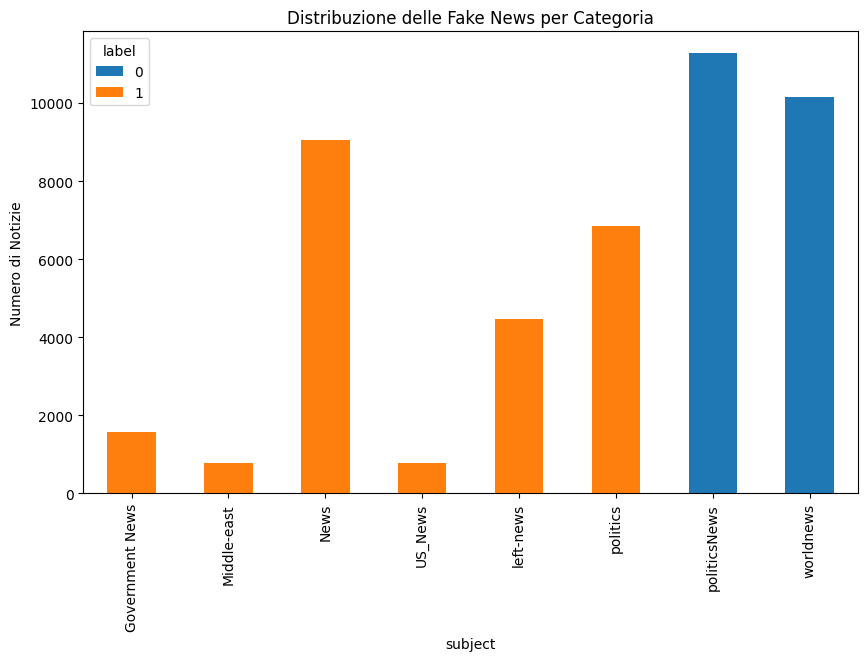

In [ ]:
# Frequenza delle fake news per Subject
if 'subject' in data.columns:
    subject_counts = data.groupby(['subject', 'label']).size().unstack().fillna(0)
    subject_counts.plot(kind='bar', stacked=True, figsize=(10, 6), title="Distribuzione delle Fake News per Categoria")
    plt.ylabel('Numero di Notizie')
    plt.show()

Le fake news più frequenti riguardano le **Notizie sulla Politica** e le **Notizie Mondiali**.

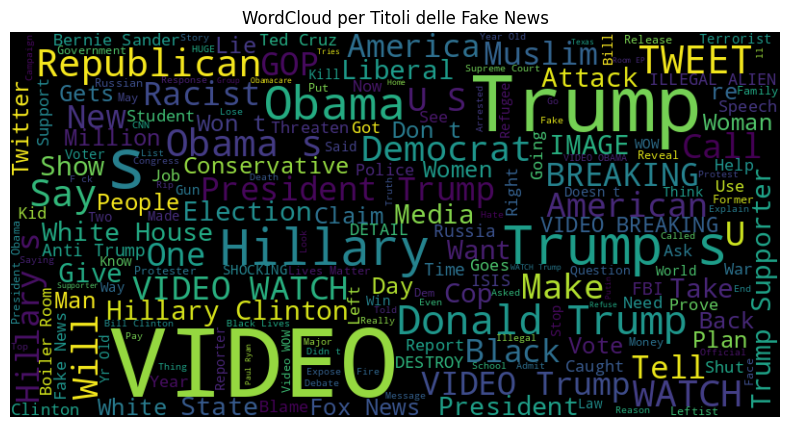

In [ ]:
# WordCloud per titoli delle fake news
fake_titles = ' '.join(fake_data['title'])
wordcloud_fake_titles = WordCloud(width=800, height=400, max_font_size=100).generate(fake_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake_titles, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud per Titoli delle Fake News")
plt.show()

Nei Titoli delle fake news compaiono molto spessole parole riguardanti la **politica statunitense** come Trump, Republican e Obama e compare spesso anche la parola **Video**.

In [ ]:
# Identificazione di pattern nei titoli delle fake news con clustering
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_fake_titles = tfidf_vectorizer.fit_transform(fake_data['title'])

In [ ]:
# Clustering (KMeans) per cercare pattern nei titoli
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
fake_data['cluster'] = kmeans.fit_predict(X_fake_titles)


In [ ]:
# Titoli più rappresentativi di ciascun cluster
for cluster_num in range(n_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_titles = fake_data[fake_data['cluster'] == cluster_num]['title']
    print(cluster_titles.head(10))  # Visualizza i primi 10 titoli di questo cluster
    print("\n")

Cluster 0:
3       Trump Is So Obsessed He Even Has Obama’s Name...
60      Pro-Trump Group Is Now Using Pictures Of An O...
62      Former Obama Photographer Takes Trolling Trum...
70      Ivanka Defends Malia Obama From Attacks, Her ...
88      Trump Admin. Tosses Out Another Obama Rule – ...
96      That Story Trump Just Told The Press About Ob...
206     W. Virginia Halloween Store Boasts Shockingly...
278     Tea Party Superstar Gets WRECKED After Obama ...
287     Obama’s Head Of Disaster Relief TRASHES Trump...
291     Trump Is Too Incompetent To Handle Disaster O...
Name: title, dtype: object


Cluster 1:
18     SNL Hilariously Mocks Accused Child Molester ...
24     White House: It Wasn’t Sexist For Trump To Sl...
26     Accused Child Molesting Senate Candidate Roy ...
28     Liberal Group Trolls Trump At Roy Moore Rally...
41     ‘Ghost Of Witness Flipped’: Hilarious SNL Ski...
44     Watch This Awesome Mashup of Michael Flynn Le...
49     Joe Scarborough: It’s Not Our Imagin

<ipython-input-20-821a02aa29fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=fake_data, palette='viridis')


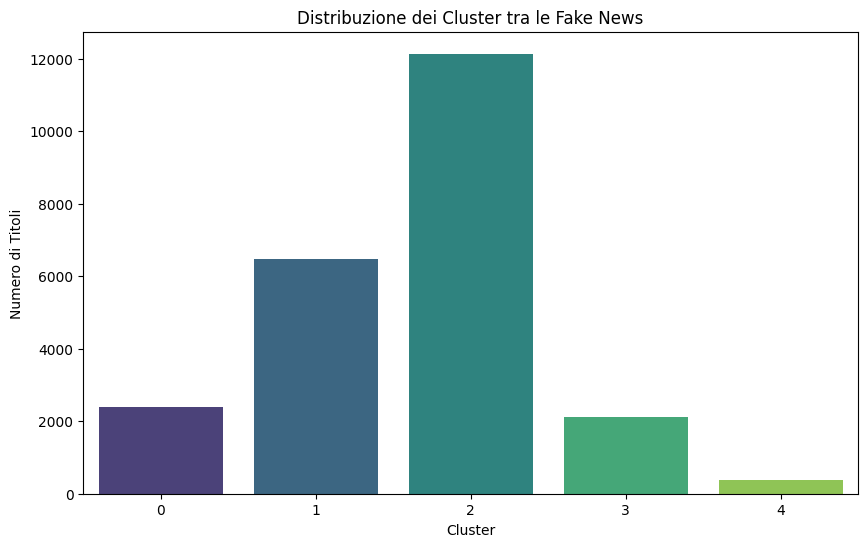

In [ ]:
# Grafico per vedere la distribuzione dei cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=fake_data, palette='viridis')
plt.title("Distribuzione dei Cluster tra le Fake News")
plt.xlabel("Cluster")
plt.ylabel("Numero di Titoli")
plt.show()

Il **Cluster 2** risulta avere il maggior numero di titoli di fake news ed è quello che riguarda i titoli che menzionano **Trump**.

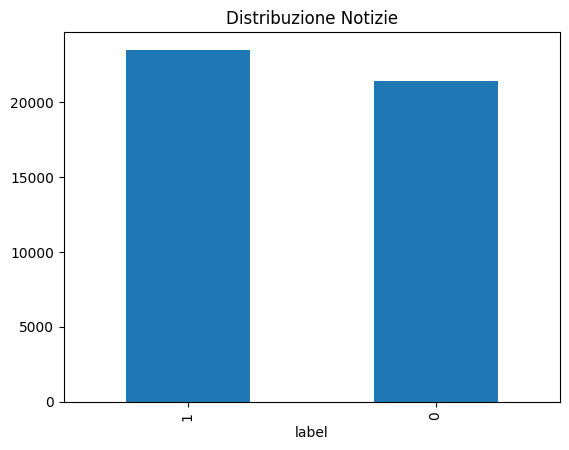

In [ ]:
# Visualizzazione della distribuzione delle notizie
data['label'].value_counts().plot(kind='bar', title='Distribuzione Notizie')
plt.show()

Le fake news sono **più** delle true news.

In [ ]:
# Preprocessing del testo
data['text'] = data['title'] + " " + data['text']

In [ ]:
# Dataset prima della pulizia
data['text'].head(3)

,text
0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...


In [ ]:
# Data Cleaning
import string
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

english_stopwords = stopwords.words('english')
nlp = spacy.load('en_core_web_sm')
punctuation = set(string.punctuation)

def data_cleaner(sentence):
    sentence = sentence.lower()
    for c in string.punctuation:
        sentence = sentence.replace(c, " ")
    document = nlp(sentence)
    sentence = ' '.join(token.lemma_ for token in document)
    sentence = ' '.join(word for word in sentence.split() if word not in english_stopwords)
    sentence = re.sub('\d', '', sentence)

    return sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Dataset dopo la pulizia
data['cleaned_text'] = data['text'].apply(data_cleaner)
data['cleaned_text'].head(3)

,cleaned_text
0,u budget fight loom republicans flip fiscal sc...
1,u military accept transgender recruit monday p...
2,senior u republican senator let mr mueller job...


In [ ]:
# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)

In [ ]:
# Conversione del testo in TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Addestramento del modello
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Predizione e valutazione
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4330
           1       0.93      0.94      0.94      4650

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

[[4000  330]
 [ 259 4391]]


In [ ]:
# Definizione dei parametri
param_grid = {'alpha': [0.1, 0.5, 1.0]}

In [ ]:
# Grid Search
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0]})

In [ ]:
# Miglior modello
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4330
           1       0.94      0.95      0.94      4650

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [ ]:
# Salvataggio del modello
with open('fake_news_detector.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
# Salvataggio del vettorizzatore TF-IDF
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)